# Probabilidade e distribuição normal

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

In [2]:
data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

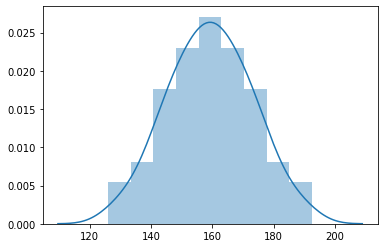

In [6]:
sns.distplot(data);

In [7]:
mean = np.mean(data)
std = np.std(data)
mean, std

(159.25, 13.65)

In [9]:
qs = np.quantile(data, [0.25,0.5,0.75])
qs

array([150.5 , 159.25, 168.  ])

## Distribuição normal padronizada

- Distribuições normais não possuem a mesma média e desvio padrão
- Difícil comparar resultados entre duas ou mais bases de dados
- Transformar a distribuição:
    - Média: 0
    - Desvio padrão: 1
    
    
- <big>${Z_{score}=\frac{(x-média)}{Desvio Padrão}}$</big>

### Calcular a probabilidade de selecionar uma pessoa em Q1

In [11]:
(qs[0] - mean) / std

-0.641025641025641

In [12]:
0.26109

0.26109

In [23]:
stats.norm.cdf(qs[0], mean, std)

0.26075301195608336

### Calcular a probabilidade de selecionar uma pessoa em Q3

In [13]:
(qs[2] - mean) / std

0.641025641025641

In [14]:
0.73891 # Probabilidade cumulativa

0.73891

In [15]:
1 - 0.73891

0.26109000000000004

In [26]:
1 - stats.norm.cdf(qs[2], mean, std)

0.26075301195608336

In [29]:
stats.norm.sf(qs[2], mean, std)

0.26075301195608336

### Calcular a probabilidade de selecionar uma pessoa entre Q2 e Q3

In [16]:
(qs[2] - mean) / std

0.641025641025641

In [18]:
0.73891 # Probabilidade cumulativa Q3

0.73891

In [17]:
(qs[1] - mean) / std

0.0

In [19]:
0.5 # Probabilidade cumulativa Q2

0.5

In [20]:
0.73891 - 0.5 # Probabilidade entre Q2 e Q3

0.23890999999999996

In [31]:
stats.norm.cdf(qs[2], mean, std)

0.7392469880439166

In [32]:
stats.norm.cdf(qs[1], mean, std)

0.5

In [33]:
stats.norm.cdf(qs[2], mean, std) - stats.norm.cdf(qs[1], mean, std)

0.23924698804391664

### Calcular a probabilidade de selecionar uma pessoa em Q1 ou Q3

In [21]:
# P(Q1) + P(Q3)
0.26109 + 0.26109 # Probabilidade em Q1 ou Q3

0.52218

In [36]:
stats.norm.sf(qs[2], mean, std) + stats.norm.cdf(qs[0], mean, std)

0.5215060239121667

### Calcular a probabilidade de não selecionar uma pessoa em Q1 ou Q3

In [22]:
1 - 0.52218 # Probabilidade NÃO em Q1 ou Q3

0.47782

In [39]:
1 - (stats.norm.sf(qs[2], mean, std) + stats.norm.cdf(qs[0], mean, std))

0.4784939760878333

### Exercício 1
    
- Uma empresa fez um concurso para seleção de novos funcionários. A prova tinha 50 questões e o Pedro acertou 40 questões. Considerando uma distribuição normal com média 24 e desvio padrão de 8, quais são as chances dele ser contratado?

In [44]:
z = (40 - 24) / 8
z

2.0

In [45]:
0.97725

0.97725

In [43]:
stats.norm.cdf(40, 24, 8)

0.9772498680518208

In [47]:
stats.norm.cdf(z)

0.9772498680518208

In [48]:
stats.norm.ppf(stats.norm.cdf(z))

2.0000000000000004

### Exercício 2

- A vida útil de uma marca de pneus é representada por uma distribuição normal com média de 38.000 km e desvio padrão de 3.000 km


1. Qual a probabilidade de que um pneu escolhido aleatóriamente tenha vida útil de 35.000 km?
2. Qual a probabilidade de que ele dure mais do que 44.000 km?

In [49]:
z = (35000 - 38000) / 3000
z

-1.0

In [54]:
stats.norm.sf(35000, 38000, 3000)

0.8413447460685429

In [51]:
z = (44000 - 38000) / 3000
z

2.0

In [55]:
stats.norm.sf(44000, 38000, 3000)

0.022750131948179195